In [41]:
#r "nuget:Microsoft.Data.Analysis,0.21.0"

Installed Packages Microsoft.Data.Analysis, 0.21.0

In [42]:
using Microsoft.Data.Analysis;

string[] names = { "Oliver", "Charlotte", "Henry", "Amelia", "Owen" };
int[] ages = { 23, 19, 42, 64, 35 };
double[] heights = { 1.91, 1.62, 1.72, 1.57, 1.85 };

DataFrameColumn[] columns = {
    new StringDataFrameColumn("Name", names),
    new PrimitiveDataFrameColumn<int>("Age", ages),
    new PrimitiveDataFrameColumn<double>("Height", heights),
};

DataFrame df = new(columns);

In [43]:
df

index,Name,Age,Height
0,Oliver,23,1.91
1,Charlotte,19,1.62
2,Henry,42,1.72
3,Amelia,64,1.57
4,Owen,35,1.85


In [44]:
List<KeyValuePair<string, object>> newRowData = new()
{
    new KeyValuePair<string, object>("Name", "Scott"),
    new KeyValuePair<string, object>("Age", 36),
    new KeyValuePair<string, object>("Height", 1.65),
};

df.Append(newRowData, inPlace: true);

In [45]:
int[] weights = {123, 321, 111, 121, 131, 141};
PrimitiveDataFrameColumn<int> weightCol = new("Weight", weights);
df.Columns.Add(weightCol)

In [46]:
df.OrderBy("Name")

index,Name,Age,Height,Weight
0,Amelia,64,1.57,121
1,Charlotte,19,1.62,321
2,Henry,42,1.72,111
3,Oliver,23,1.91,123
4,Owen,35,1.85,131
5,Scott,36,1.65,141


In [47]:
df.OrderBy("Name").Filter(df["Age"].ElementwiseGreaterThan(30))

index,Name,Age,Height,Weight
0,Henry,42,1.72,111
1,Oliver,23,1.91,123
2,Owen,35,1.85,131
3,Scott,36,1.65,141


In [48]:
df.Filter(df["Age"].ElementwiseGreaterThan(30)).OrderBy("Name")

index,Name,Age,Height,Weight
0,Amelia,64,1.57,121
1,Henry,42,1.72,111
2,Owen,35,1.85,131
3,Scott,36,1.65,141


In [49]:
var orderedDf = df.OrderBy("Name");
var filteredDf = orderedDf.Filter(orderedDf["Age"].ElementwiseGreaterThan(30));
filteredDf

index,Name,Age,Height,Weight
0,Amelia,64,1.57,121
1,Henry,42,1.72,111
2,Owen,35,1.85,131
3,Scott,36,1.65,141


In [50]:
df.OrderBy("Name").Filter(df["Age"].ElementwiseGreaterThan(30));

df.Filter(df["Age"].ElementwiseGreaterThan(30)).OrderBy("Name");

var orderedDf = df.OrderBy("Name");
var filteredDf = orderedDf.Filter(orderedDf["Age"].ElementwiseGreaterThan(30));
filteredDf

index,Name,Age,Height,Weight
0,Amelia,64,1.57,121
1,Henry,42,1.72,111
2,Owen,35,1.85,131
3,Scott,36,1.65,141


In [51]:
DataFrameColumn iqCol = df["Age"] * df["Height"] * 1.5;

double[] iqs = Enumerable.Range(0, (int)iqCol.Length)
    .Select(x => (double)iqCol[x])
    .ToArray();

df.Columns.Add(new PrimitiveDataFrameColumn<double>("IQ", iqs));
df

index,Name,Age,Height,Weight,IQ
0,Oliver,23,1.91,123,65.895
1,Charlotte,19,1.62,321,46.17
2,Henry,42,1.72,111,108.35999999999999
3,Amelia,64,1.57,121,150.72
4,Owen,35,1.85,131,97.125
5,Scott,36,1.65,141,89.1


In [52]:
private static (double mean, double std) MeanAndStd(double[] values)
{
  if (values is null)
    throw new ArgumentNullException(nameof(values));

  if (values.Length == 0)
    throw new ArgumentException($"{nameof(values)} must not be empty");

  double sum = 0;
  for (int i = 0; i < values.Length; i++)
    sum += values[i];

  double mean = sum / values.Length;

  double sumVariancesSquared = 0;
  for (int i = 0; i < values.Length; i++)
  {
    double pointVariance = Math.Abs(mean - values[i]);
    double pointVarianceSquared = Math.Pow(pointVariance, 2);
    sumVariancesSquared += pointVarianceSquared;
  }

  double meanVarianceSquared = sumVariancesSquared / values.Length;
  double std = Math.Sqrt(meanVarianceSquared);

  return (mean, std);
}

In [53]:
foreach (DataFrameColumn col in df.Columns.Skip(1))
{
    // warning: additional care must be taken for datasets which contain null
    double[] values = Enumerable.Range(0, (int)col.Length).Select(x => Convert.ToDouble(col[x])).ToArray();
    (double mean, double std) = MeanAndStd(values);
    Console.WriteLine($"{col.Name} = {mean} +/- {std:N3} (n={values.Length})");
}

Age = 36.5 +/- 14.592 (n=6)
Height = 1.72 +/- 0.123 (n=6)
Weight = 158 +/- 73.473 (n=6)
IQ = 92.895 +/- 32.983 (n=6)


In [54]:
df

index,Name,Age,Height,Weight,IQ
0,Oliver,23,1.91,123,65.895
1,Charlotte,19,1.62,321,46.17
2,Henry,42,1.72,111,108.35999999999999
3,Amelia,64,1.57,121,150.72
4,Owen,35,1.85,131,97.125
5,Scott,36,1.65,141,89.1


In [55]:
#r "nuget:ScottPlot, 5.0.36"

Installed Packages ScottPlot, 5.0.36

In [56]:
using Microsoft.DotNet.Interactive.Formatting;
Formatter.Register(typeof(ScottPlot.Plot), (p, w) => 
    w.Write(((ScottPlot.Plot)p).GetImageHtml(400, 300)), HtmlFormatter.MimeType);

In [57]:
df

index,Name,Age,Height,Weight,IQ
0,Oliver,23,1.91,123,65.895
1,Charlotte,19,1.62,321,46.17
2,Henry,42,1.72,111,108.35999999999999
3,Amelia,64,1.57,121,150.72
4,Owen,35,1.85,131,97.125
5,Scott,36,1.65,141,89.1


In [58]:
using ScottPlot;
using Microsoft.Data.Analysis;
using System;
using System.Linq;

In [59]:
df["Age"]

NullCount,0
Length,6
Name,Age
DataType,System.Int32
(values),"[ 23, 19, 42, 64, 35, 36 ]"


In [60]:
df["Height"]

NullCount,0
Length,6
Name,Height
DataType,System.Double
(values),"[ 1.91, 1.62, 1.72, 1.57, 1.85, 1.65 ]"


In [61]:
// df = df.OrderBy("");
int[] xs = df["Age"].Cast<int>().ToArray();
double[] ys = df["Height"].Cast<double>().ToArray();

ScottPlot.Plot myPlot = new();
myPlot.Add.Scatter(xs, ys);


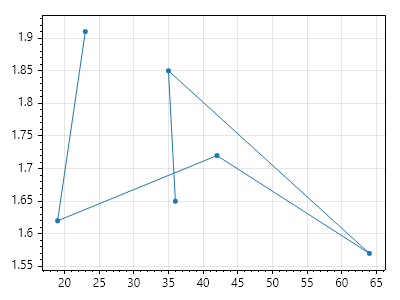

In [62]:
myPlot

In [75]:
df.Info()

index,Info,Name,Age,Height,Weight,IQ
0,DataType,System.String,System.Int32,System.Double,System.Int32,System.Double
1,Length (excluding null values),6,6,6,6,6


In [81]:
var n_df = df.OrderBy("Age");
double[] xs = n_df["Age"].Cast<double>().ToArray();
double[] ys = n_df["Height"].Cast<double>().ToArray();

ScottPlot.Plot myPlot = new();
myPlot.Add.Scatter(xs, ys);


Error: System.InvalidCastException: Unable to cast object of type 'System.Int32' to type 'System.Double'.
   at System.Linq.Enumerable.CastIterator[TResult](IEnumerable source)+MoveNext()
   at System.Collections.Generic.LargeArrayBuilder`1.AddRange(IEnumerable`1 items)
   at System.Collections.Generic.EnumerableHelpers.ToArray[T](IEnumerable`1 source)
   at Submission#79.<<Initialize>>d__0.MoveNext()
--- End of stack trace from previous location ---
   at Microsoft.CodeAnalysis.Scripting.ScriptExecutionState.RunSubmissionsAsync[TResult](ImmutableArray`1 precedingExecutors, Func`2 currentExecutor, StrongBox`1 exceptionHolderOpt, Func`2 catchExceptionOpt, CancellationToken cancellationToken)


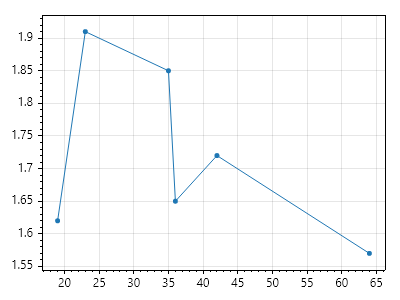

In [68]:
myPlot